In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

##The Vector space model

See http://nlp.stanford.edu/IR-book/ from which this text is taken.

We denote by $\bar V(d)$ the vector derived from document d, with one com- ponent in the vector for each dictionary term. The set of documents in a collection then may be viewed as a set of vectors in a vector space, in which there is one axis for each term. This representation loses the relative ordering of the terms in each document. The documents Mary is quicker than John and John is quicker than Mary are identical in such a bag of words representation. the standard way of quantifying the similarity between two documents $d_1$ and $d_2$  is to compute the cosine similarity of their vector representations $\bar V(d_1)$ and $\bar V(d_2)$:

$$S_{12} = \frac{\bar V(d_1) \cdot \bar V(d_2)}{|\bar V(d_1)| \times |\bar V(d_2)|}$$

![Vector Space Model](vsm.png)

The formula can be viewed as the dot product of the normalized versions of the two document vectors. Given a document d (potentially one of the $d_i$ in the collection), consider searching for the documents in the collection most similar to d. Such a search is useful in a system where a user may identify a document and seek others like it – a feature available in the results lists of search engines as a more like this feature.

Viewing a collection of N documents as a collection of vectors leads to a TERM-DOCUMENT natural view of a collection as a term-document matrix: this is an M × N matrix whose rows represent the M terms (dimensions) of the N columns, each of which corresponds to a document. As always, the terms being indexed could be stemmed before indexing; for instance, jealous and jealousy would under stemming be considered as a single dimension.

![novel terms](terms.png)

There is a far more compelling reason to represent documents as vectors: we can also view a query as a vector. Consider the query q = jealous gossip. This query turns into the unit vector $\bar V(q)$ = (0, 0.707, 0.707) on the three coordinates below. 

![novel terms](terms2.png)

The key idea now: to assign to each document d a score equal to the dot product:

$$\bar V(q) \cdot \bar V(d)$$

Wuthering Heights is the top-scoring docu- ment for this query with a score of 0.509, with Pride and Prejudice a distant second with a score of 0.085, and Sense and Sensibility last with a score of 0.074. This simple example is somewhat misleading: the number of dimensions in practice will be far larger than three: it will equal the vocabulary size M.

## The Reverend Bayes
(From Think Bayes, a very fun Oreilly book(online at http://www.greenteapress.com/thinkbayes/)


When two events happen together:

$$p(A  and  B) = p(A) p(B|A) $$

Flip it:

$$p(B  and  A) = p(B) p(A|B) $$

Thus

$$p(B) p(A|B) = p(A) p(B|A) $$


$$p(A|B) = \frac{p(A) p(B|A)}{p(B)}$$
 


##Naive Bayes

Some parts and code stolen from HW3 for CS109 in 2013. 



$$P(c|d) \propto P(d|c) P(c) $$

$$P(d|c)  = \prod_k P(t_k | c) $$, the conditional independence assumption.

Then we see that for which c is $P(c|d)$ higher.

For floating point underflow we change the product into a sum. But we must also handle non-existent terms, we cant have 0's for them:

$$P(t_k|c) = \frac{N_{kc}+\alpha}{N_c+\alpha N_{feat}}$$


###Rotten tomatoes data set

In [2]:
critics = pd.read_csv('./critics.csv')
#let's drop rows with missing quotes
critics = critics[~critics.quote.isnull()]
critics.head()

,critic,fresh,imdb,publication,quote,review_date,rtid,title
1,Derek Adams,fresh,114709,Time Out,"So ingenious in concept, design and execution ...",2009-10-04,9559,Toy story
2,Richard Corliss,fresh,114709,TIME Magazine,The year's most inventive comedy.,2008-08-31,9559,Toy story
3,David Ansen,fresh,114709,Newsweek,A winning animated feature that has something ...,2008-08-18,9559,Toy story
4,Leonard Klady,fresh,114709,Variety,The film sports a provocative and appealing st...,2008-06-09,9559,Toy story
5,Jonathan Rosenbaum,fresh,114709,Chicago Reader,"An entertaining computer-generated, hyperreali...",2008-03-10,9559,Toy story


###Explore

In [3]:
n_reviews = len(critics)
n_movies = critics.rtid.unique().size
n_critics = critics.critic.unique().size


print "Number of reviews: %i" % n_reviews
print "Number of critics: %i" % n_critics
print "Number of movies:  %i" % n_movies

Number of reviews: 15561
Number of critics: 623
Number of movies:  1921


([<matplotlib.axis.YTick at 0x10add7cd0>,
 <a list of 6 Text yticklabel objects>)

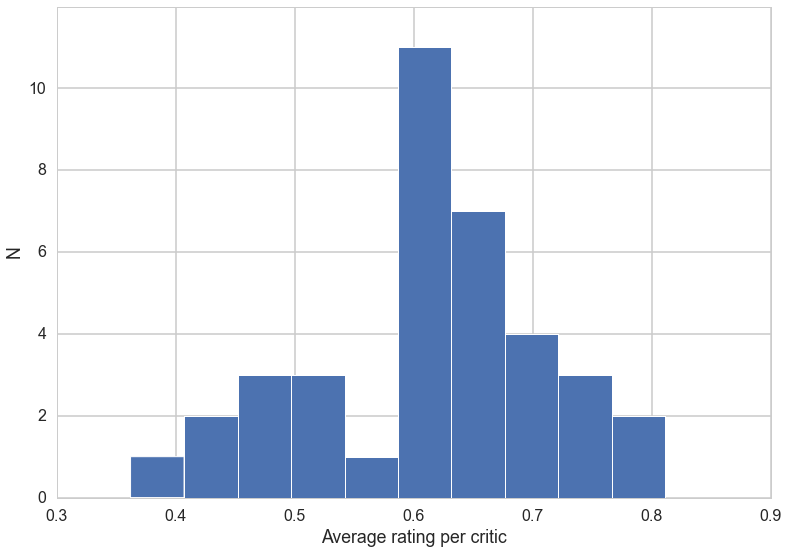

In [4]:
df = critics.copy()
df['fresh'] = df.fresh == 'fresh'
grp = df.groupby('critic')
counts = grp.critic.count()  # number of reviews by each critic
means = grp.fresh.mean()     # average freshness for each critic

means[counts > 100].hist(bins=10, edgecolor='w', lw=1)
plt.xlabel("Average rating per critic")
plt.ylabel("N")
plt.yticks([0, 2, 4, 6, 8, 10])

###The classifier

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['Hop on pop', 'Hop off pop', 'Hop Hop hop']
print "Original text is\n", '\n'.join(text)

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

print
print "Transformed text vector is \n", x

# `get_feature_names` tracks which word is associated with each column of the transformed x
print
print "Words for each feature:"
print vectorizer.get_feature_names()

# Notice that the bag of words treatment doesn't preserve information about the *order* of words, 
# just their frequency

Original text is
Hop on pop
Hop off pop
Hop Hop hop

Transformed text vector is 
[[1 0 1 1]
 [1 1 0 1]
 [3 0 0 0]]

Words for each feature:
[u'hop', u'off', u'on', u'pop']


In [6]:
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = (critics.fresh == 'fresh').values.astype(np.int)
    return X, y
X, y = make_xy(critics)

In [8]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y)
clf = MultinomialNB().fit(xtrain, ytrain)
print "MN Accuracy: %0.2f%%" % (100 * clf.score(xtest, ytest))


MN Accuracy: 76.90%


In [9]:
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.92
Accuracy on test data:     0.77


###Cross-Validation and hyper-parameter fitting

In [10]:
from sklearn.cross_validation import KFold
result = 0
nfold = 5
for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
    clf.fit(X[train], y[train]) # fit
    result += clf.score(X[test], y[test]) # evaluate score function on held-out data
print result / nfold # average

0.765118166871


In [11]:
def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

We use the log-likelyhood as the score here. We'll go into this later...

In [12]:
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

In [13]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis = make_xy(critics, vectorizer)
        
        #your code here
        clf = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf, Xthis, ythis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

In [14]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 5.000000
min_df: 0.001000


###Work with the best params

In [15]:
vectorizer = CountVectorizer(min_df=best_min_df)
X, Y = make_xy(critics, vectorizer)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Your code here. Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

Accuracy on training data: 0.79
Accuracy on test data:     0.74


In [17]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(ytest, clf.predict(xtest))

[[ 950  570]
 [ 444 1927]]


###Interpretation

In [18]:
words = np.array(vectorizer.get_feature_names())

x = np.eye(xtest.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

good_words = words[ind[:10]]
bad_words = words[ind[-10:]]

good_prob = probs[ind[:10]]
bad_prob = probs[ind[-10:]]

print "Good words\t     P(fresh | word)"
for w, p in zip(good_words, good_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))
    
print "Bad words\t     P(fresh | word)"
for w, p in zip(bad_words, bad_prob):
    print "%20s" % w, "%0.2f" % (1 - np.exp(p))

Good words	     P(fresh | word)
             delight 0.90
         masterpiece 0.89
         intelligent 0.88
           hilarious 0.88
             kubrick 0.87
               witty 0.87
            touching 0.87
          remarkable 0.86
         beautifully 0.86
               smart 0.86
Bad words	     P(fresh | word)
               sadly 0.21
            tiresome 0.19
               bland 0.18
                dull 0.18
             unfunny 0.18
          uninspired 0.18
      disappointment 0.17
           pointless 0.16
                lame 0.15
       unfortunately 0.14


In [19]:
x, y = make_xy(critics, vectorizer)

prob = clf.predict_proba(x)[:, 0]
predict = clf.predict(x)

bad_rotten = np.argsort(prob[y == 0])[:5]
bad_fresh = np.argsort(prob[y == 1])[-5:]

print "Mis-predicted Rotten quotes"
print '---------------------------'
for row in bad_rotten:
    print critics[y == 0].quote.irow(row)
    print

print "Mis-predicted Fresh quotes"
print '--------------------------'
for row in bad_fresh:
    print critics[y == 1].quote.irow(row)
    print

Mis-predicted Rotten quotes
---------------------------
Herzog offers some evidence of Kinski's great human warmth, somewhat more of his rage of unimaginable proportions, and a good demonstration of Kinski's uncanny capacity to corkscrew his way into the frame.

Benefits from a lively lead performance by the miscast Denzel Washington but doesn't come within light years of the book, one of the greatest American autobiographies.

It's a sad day when an actor who's totally, beautifully in touch with his dark side finds himself stuck in a movie that's scared of its own shadow.

The Waterboy is arguably Sandler's most enjoyable motion picture to date, but it's still far from a masterpiece.

It is sometimes funny in a puzzling kind of way, it is generally overwrought in an irritating kind of way, and once in a while it is inappropriately touching.

Mis-predicted Fresh quotes
--------------------------
The gangland plot is flimsy (bad guy Peter Greene wears too much eyeliner), and the jokes a

In [20]:
clf.predict_proba(vectorizer.transform(['This movie is not remarkable, touching, or superb in any way']))

array([[ 0.01834196,  0.98165804]])